In [44]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn import metrics 
# import accuracy_score
import pickle 
# import os 

In [45]:
df = pd.read_csv(r"C:\Users\nline\Downloads\credit card data\card_transdata.csv")

In [46]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [48]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [49]:
df.dropna(how='any', inplace=True)
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [50]:
print(df.fraud.value_counts())

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


In [51]:
df = pd.concat([
    df[df.fraud == 1],
    df[df.fraud == 0].sample(n = 87403)
])

In [52]:
df.fraud.value_counts()

fraud
1.0    87403
0.0    87403
Name: count, dtype: int64

In [56]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [53]:
df['fraud'] =df['fraud'].astype(int)

In [54]:
x = df.drop([ 'fraud'],axis=1)
y = df["fraud"]

In [55]:
x

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
875447,60.003317,0.550338,1.033565,1.0,0.0,0.0,1.0
583681,5.003977,3.432604,3.545329,1.0,0.0,0.0,0.0
885930,19.796540,4.590484,0.403581,1.0,1.0,0.0,0.0
622659,2.447733,3.942033,1.177172,1.0,0.0,0.0,0.0


In [16]:
y

13        1
24        1
29        1
35        1
36        1
         ..
497969    0
277189    0
730682    0
831883    0
763020    0
Name: fraud, Length: 174806, dtype: int32

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [18]:
x_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
251037,20.797719,4.164030,1.508382,1.0,1.0,0.0,1.0
278409,4.614378,2.515748,4.225013,1.0,1.0,0.0,1.0
90046,16.162802,0.338469,0.183760,1.0,0.0,0.0,0.0
905048,5.007452,24.491706,8.784687,1.0,0.0,0.0,1.0
937907,4.280713,0.012885,4.114876,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
521481,80.292648,0.047526,0.798400,1.0,0.0,0.0,1.0
303753,11.188869,0.889023,2.799993,1.0,1.0,0.0,1.0
559093,10.830705,0.435825,1.902612,1.0,0.0,1.0,1.0
836842,0.347743,2.076382,2.057498,0.0,0.0,0.0,1.0


In [19]:
x_test

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
287509,8.668889,0.725783,11.439120,1.0,1.0,0.0,1.0
914581,28.501728,1.629492,11.710914,1.0,0.0,0.0,1.0
797041,13.759214,1.531182,1.029678,1.0,1.0,0.0,0.0
876693,1.432219,2.414262,1.865152,0.0,0.0,0.0,0.0
321397,46.161612,0.122207,1.118506,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
659063,29.146176,0.180961,7.931539,1.0,0.0,0.0,1.0
134435,153.439453,0.603156,0.754232,1.0,0.0,0.0,1.0
765798,4.690698,9.951397,18.915655,1.0,1.0,0.0,1.0
338564,2.291099,0.069819,4.687260,1.0,0.0,0.0,1.0


In [20]:
y_train

251037    0
278409    1
90046     0
905048    1
937907    1
         ..
521481    0
303753    0
559093    0
836842    0
380923    0
Name: fraud, Length: 139844, dtype: int32

In [21]:
y_test

287509    1
914581    1
797041    0
876693    0
321397    0
         ..
659063    1
134435    1
765798    1
338564    1
498276    0
Name: fraud, Length: 34962, dtype: int32

In [22]:
log_reg_model = LogisticRegression()

In [23]:
log_reg_model.fit(x_train, y_train)

C:\Users\online\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
# test data set prediction
log_train_model = log_reg_model.predict(x_train)

In [58]:
log_reg_model.score(x_train, y_train)*100

93.94539629873287

<function matplotlib.pyplot.show(close=None, block=None)>

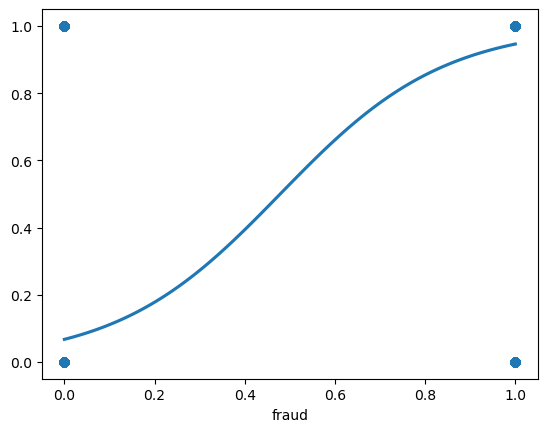

In [26]:
sns.regplot(x = y_train, y = test_data_prediction, logistic = True, ci = None)
plt.show

In [59]:
log_test_model = log_reg_model.predict(x_test)

In [60]:
log_reg_model.score(x_test, y_test)*100

93.93913391682398

<Axes: xlabel='fraud'>

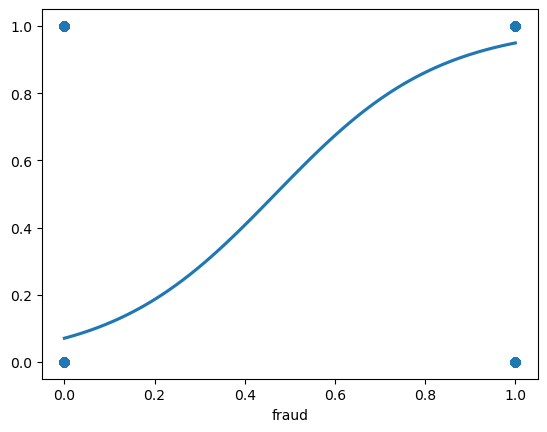

In [61]:
sns.regplot(x = y_test, y = log_test_model, logistic = True, ci = None)


In [63]:
y_test

287509    1
914581    1
797041    0
876693    0
321397    0
         ..
659063    1
134435    1
765798    1
338564    1
498276    0
Name: fraud, Length: 34962, dtype: int32

In [65]:
line = 659063

a = list(x_test.loc[line])
b = y_test.loc[line]

a1 = log_reg_model.predict([a])

print("List of arguments:                               ",a)
print("Actual Amount:                                   ",b)

print("Model Prediction Amount:                         ",a1)

print("Difference Between Actual and Prediction:        ",a1 - b)

List of arguments:                                [29.146175619162943, 0.1809606056249522, 7.931538821996865, 1.0, 0.0, 0.0, 1.0]
Actual Amount:                                    1
Model Prediction Amount:                          [1]
Difference Between Actual and Prediction:         [0]


C:\Users\online\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [66]:
saved_model = pickle.dumps(log_reg_model)
FraudDetection_from_pickle = pickle.loads(saved_model)
FraudDetection_from_pickle.predict(x_test)

array([1, 1, 0, ..., 1, 1, 0])

In [67]:
line = 321397 

a = list(x_test.loc[line])
b = y_test.loc[line]

a1 = log_reg_model.predict([a])

print("List of arguments:                               ",a)
print("Actual Amount:                                   ",b)

print("Model Prediction Amount:                         ",a1)

print("Difference Between Actual and Prediction:        ",a1 - b)

List of arguments:                                [46.16161198317944, 0.1222069373572929, 1.1185064936977644, 1.0, 0.0, 0.0, 0.0]
Actual Amount:                                    0
Model Prediction Amount:                          [0]
Difference Between Actual and Prediction:         [0]


C:\Users\online\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [68]:
pickle.dump(log_reg_model, open("CreditCardFraud.pkl", "wb"))

In [69]:
pickle_model = pickle.load(open("CreditCardFraud.pkl", "rb"))